### Group Members:

- Honegger Roberto, 16-715-419


# Assignment 1: Universal Function Approximator


The goal of this exercise is to compare three different neural network architectures and analyze their capacity for function approximation:

1. $N_1$: One-layer network (linear transformation only)
2. $N_2$: One-layer network with non-linear activation function
3. $N_3$: Two-layer network (hidden layer with non-linear activation function)

They will be trained via gradient descent (with weight decay). To show the flexibility of the approach, three different functions will be approximated:
1. $X_1: t = \cos(3x)$ for $x\in[-2,2]$
2. $X_2: t = e^{-x^2}$ for $x\in[-1,1]$
3. $X_3: t = x^5 + 3x^4 - 6x^3 -12x^2 + 5x + 129$ for $x\in[-4,2.5]$

In the theoretical section, the networks will be designed, and the necessary derivatives will be computed by hand.

In the coding section, we will: 

- implement the networks and their gradients,
- generate target data for three different functions, 
- apply the training procedure to the data, and 
- plot the resulting approximated function together with the data samples.

## Section 1: Theoretical Questions

### Network Design

#### Task 1.1: Network Structure

Given input $\vec x = (1, x)^T$, define three neural networks ($N_1$, $N_2$, $N_3$) mathematically, to reach output $y$. Use $g()$ to represent the activation function.

Explain how their structures differ and analyze their function approximation capabilities.

--- 
Note:

For one-layer networks, define parameter $\Theta=\vec w \in\mathbb R^{D+1}$

For two-layer network, define parameters $\Theta=(\mathbf W^{(1)},\vec w^{(2)})$ that are split into $\mathbf W^{(1)}\in\mathbb R^{K\times {(D+1)}}$ for the first layer and $\vec w^{(2)}\in\mathbb R^{K+1}$ for the second layer

#### Answer 1.1

### $N_1$: One-Layer Network (Linear Transformation Only)

**Parameters:**  
Weight vector as  
$\vec{w} = \begin{pmatrix} w_0 \\ w_1 \end{pmatrix} \in \mathbb{R}^{2}.$

**Mapping:**  
Computed by the dot product of  
$y = \vec{w}^T \vec{x} = w_0 + w_1 x.$

**Function Approximation Capability:**  
Since this model is linear and can only represent straight-line functions, it is limited in its ability to capture non-linear behaviors (e.g., in $\cos(3x)$ or $e^{-x^2}$).

---

### $N_2$: One-Layer Network with Non-Linear Activation

**Parameters:**  
Same weight vector as in $N_1$:
$\vec{w} = \begin{pmatrix} w_0 \\ w_1 \end{pmatrix} \in \mathbb{R}^{2}.$

**Mapping:**  
1. Linear combination:
   $a = w_0 + w_1 x.$  
2. Then apply a non-linear activation function $g(\cdot)$:
   $y = g(a) = g(w_0 + w_1 x).$  

The output becomes a non-linear transformation of the input.

**Function Approximation Capability:**  
The introduction of the non-linearity allows the network to model curved relationships. However, with only one non-linear unit, the model's flexibility is still somewhat limited.

---

### $N_3$: Two-Layer Network (Hidden Layer with Non-Linear Activation)

**Parameters:**  
- **First Layer:**  
  Define the weight matrix for the hidden layer:
  $\mathbf{W}^{(1)} \in \mathbb{R}^{K \times 2},$
  which maps the input $\vec{x}$ to $K$ hidden neurons.
  
- **Second Layer:**  
  Define the weight vector for the output layer:
  $\vec{w}^{(2)} \in \mathbb{R}^{K+1},$
  where the extra component accounts for the bias in the output layer.

**Mapping:**  

1. **Hidden Layer:**  
   - Compute the pre-activation for each hidden neuron:
     $a_k = \bigl(\mathbf{W}^{(1)} \vec{x}\bigr)_k,\quad k = 1, \dots, K.$  
   - Apply the activation function element-wise:
     $h_k = g(a_k).$  
   - Augment the hidden layer output with a bias term:
     $\vec{h}_{\text{aug}} = \begin{pmatrix} 1 \\ h_1 \\ \vdots \\ h_K \end{pmatrix}.$

2. **Output Layer:**  
   - Compute the final output as:
     $y = \bigl(\vec{w}^{(2)}\bigr)^T \vec{h}_{\text{aug}} = w_0^{(2)} + \sum_{k=1}^{K} w_k^{(2)} h_k.$

**Function Approximation Capability:**  
With a hidden layer that employs non-linear activations, $N_3$ is capable of approximating complex, non-linear functions. According to the Universal Approximation Theorem, a two-layer network with a sufficient number of hidden neurons can approximate any continuous function on a compact set, making it the most flexible among the three architectures.


#### Task 1.2: Network Comparison

Can the one-layer network approximate all three functions well? Why or why not?

What advantages does the two-layer network have compared to a one-layer network?

How can we determine the appropriate number of hidden neurons?
When looking at the example plots in the OLAT, how many hidden neurons do we need in order to approximate the functions? Is there any difference between the three target functions?



#### Answer 1.2:

##### 1. Can the one-layer network approximate all three functions well?

A one-layer network (with only a linear transformation, $y = w_0 + w_1 x$) can only modelstraight-line functions. None of the target functions are linear:
- **$X_1: t = \cos(3x)$** is oscillatory and therefore periodic.
- **$X_2: t = e^{-x^2}$** is a bell-shaped.
- **$X_3: t = x^5 + 3x^4 - 6x^3 - 12x^2 + 5x + 129$** is not linear at all.

Because a one-layer (purely linear) model cannot follow changing slopes, it will generally **underfit** these functions. In other words, it cannot capture the oscillations, the peaked shape, or the complex curvature required to closely follow the target functions.

---

##### 2. What advantages does the two-layer network have compared to a one-layer network?

A two-layer network (i.e., a network with one hidden layer that uses a non-linear activation) offers significant advantages:
- **Non-Linearity & Flexibility:**  
  The hidden layer applies a non-linear activation function (e.g., sigmoid) to the weighted inputs. This non-linearity allows the network to create complex combinations of basis functions. As a result, it might is able to capture curves and oscillations that a simple linear model cannot.
  
- **Universal Approximation:**  
  The Universal Approximation Theorem tells us that with a high enough number of hidden neurons, a two-layer network can approximate any continuous function on a compact interval arbitrarily well. This is way more powerful than a one-layer network. 
  
- **Intermediate Representations:**  
  The hidden layer can learn intermediate features or representations of the input. These features, when linearly combined in the output layer, yield a non-linear overall mapping from $x$ to $y$.

---

##### 3. How can we determine the appropriate number of hidden neurons?

###### **General Considerations:**
- **Empirical Tuning:**  
 Typically chosen by experimenting with different sizes and selecting the one that best balances the trade-off between underfitting (too few neurons) and overfitting (too many neurons).
  
- **Validation Performance:**  
  WE can train the network with various numbers of hidden neurons and compare the approximation error on a validation set. A plateau or a minimal validation error suggests an appropriate network size.

##### **Based on the Example Plots in OLAT:**
- For **$X_1: \cos(3x)$** and **$X_2: t = e^{-x^2}$**, the sample plots often indicate that a small number (e.g., around 3 to 4 hidden neurons) is sufficient to capture the main non-linear behavior.
- For **$X_3: t = x^5 + 3x^4 - 6x^3 - 12x^2 + 5x + 129$**, the function is more complex. The plots suggest that slightly more neurons (perhaps 4 to 5 hidden units) might be necessary to adequately approximate the function.
- 
- **Differences Between the Functions:**  
  While all three functions are non-linear, their complexity differs. The cosine and exponential functions have smooth, regular shapes that can be approximated well with fewer neurons. In contrast, the polynomial, because of its higher degree and more variable curvature over the interval, may require a marginally higher number of neurons.




#### Task 1.3: Network Performance

If the network struggles to approximate a function well, what are some possible reasons?

How can we improve the network's performance?


#### Answer 1.3:

Several factors might be involved when a network struggles to approximate a function. Here some reasons & potential solutions:

---

##### Reasons

- **Insufficient Model Capacity:**  
  The network might be too simple—e.g., having too few hidden neurons or layers—to capture the complexity of the target function. For non-linear functions like \(\cos(3x)\) or a high-degree polynomial, a single-layer network is usually inadequate.

- **Wrong Activation Functions:**  
  If the chosen activation functions (like the sigmoid) saturate (i.e., their outputs are near 0 or 1 for a wide range of inputs), the gradients can vanish. This slows down learning or may even halt it altogether.

- **Bad Weight Initialization:**  
  If weights are initialized too high or too low, the network might start in a region of the loss surface where gradients are very small or erratic, making learning inefficient.

- **Suboptimal Learning Rate:**  
  A learning rate that is too high can cause the training process to overshoot minima and diverge, while a learning rate that is too low can result in very slow convergence.

- **Problem with the Data:**  
  Unnormalized or poorly scaled input data can hinder training. If the range of input values is too wide, some neurons might saturate or dominate the learning process.

- **Not enough Training Data or poor Training:**  
  The network may not have been trained on enough samples or for enough iterations, resulting in an incomplete learning process.

- **Overfitting/Underfitting:**  
  Depending on the network design and the complexity of the function, the model may underfit (if it is too simple) or overfit (if it memorizes noise rather than learning the underlying function).

---

##### Solutions

- **Increase Model Capacity:**  
  Add more hidden neurons or layers. A deeper network or one with more neurons in the hidden layer(s) can capture more complex patterns.

- **Explore more with Activation Functions:**  
  Consider using activation functions like ReLU or tanh, which may provide better gradient flow and less saturation than the sigmoid function.

- **Improve Weight Initialization:**  
  Utilize methods such as Xavier/Glorot initialization to start with weights that are neither too high nor too low, which helps maintain a good gradient scale during training.

- **Tune the Learning Rate:**  
  Adjust the learning rate to an optimal value; sometimes using a learning rate schedule or an adaptive method (e.g., Adam, RMSProp) can help, although in this assignment gradient descent with weight decay is used.

- **Normalize the Data:**  
  Standardize or normalize inputs (and even target outputs) so that all features contribute similarly to the learning process. This helps prevent certain neurons from saturating and improves overall training dynamics.

- **Apply Regularization:**  
  Use weight decay (already in the assignment) or consider other methods like dropout to prevent overfitting if the network is too complex relative to the amount of data.

- **Increase Training Duration:**  
  Train the network for more epochs or iterations. Sometimes the network simply needs more time to converge to a good solution.

- **Monitor and Adjust:**  
  Use validation data to monitor the network’s performance during training. Adjust hyperparameters such as the learning rate, momentum (if applicable), and network size based on validation performance.



### Derivatives

#### Task 1.4: Activation Function

Given the hyperbolic tangent ($\tanh$) activation function as:

$$\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$

Prove:

$$\frac{\partial}{\partial x} \tanh(x) = 1 - \tanh^2(x)$$

Hint: Apply the derivative rules as defined in the Lecture:
* Quotient rule
* Sum rule
* Exponential rule

Also, avoid factoring out parentheses.

#### Answer 1.4:

$\frac{\partial}{\partial x} \tanh(x) =...$

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}},
$$






#### Task 1.5: Weight Decay

Consider a loss function with L2 regularization (weight decay):
$$
L'(\theta) = L(\theta) + \frac{\lambda}{2} \|\theta\|^2
$$

Compute its derivative with respect to $\theta$: $$\frac{\partial}{\partial \theta} L'(\theta)$$


#### Answer 1.5:




#### Task 1.6

How large should an appropriate weight decay parameter $\lambda$ as shown in Task 1.5 be? What would happen if $\lambda$ is set too high or too low?

#### Answer 1.6: 

Through expirementation you can determine an appropriate $\lambda$. 


- **If $\lambda$ is too high:**  
  - The regularization term \(\lambda \|\theta\|^2\) will dominate the loss.
  - The network will be forced to keep the weights very small, which can severely limit its capacity to learn the underlying patterns.
  - This usually leads to **underfitting**, where the model is too simple to capture the complexity of the data.

- **If $\lambda$ is too low:**  
  - The regularization effect becomes negligible.
  - The network may then use large weights to fit the training data very closely.
  - This increases the risk of **overfitting**, where the model captures noise in the training data and performs poorly on unseen data.

So if Landa is too high the model underfits and if it's too low the model overfits. The optimal value depends on different factos like the data, complexity, model. etc. 

## Section 2: Coding

**<font color='red' size='5'>This section has to be submitted by 11:59 p.m. on Wednesday, March 12th, to be graded.</font>**



### Network Implementation
#### Task 2.1

Recall that for one-layer networks, we define parameter $\Theta=\vec w \in\mathbb R^{D+1}$, and for a two-layer network, we define parameters $\Theta=(\mathbf W^{(1)}\in\mathbb R^{K\times {(D+1)}},\vec w^{(2)}\in\mathbb R^{K+1})$.

- D: The dimension of the input. In this assignment, $D = 1$ since there is only one input.
- K: The number of hidden neurons in the first layer of the two-layer network ($N_3$)

Implement a function that returns the network output for a given input $\vec x$, parameter(s) $\Theta$, and model_type ($N_1$, $N_2$, or $N_3$). Remember that the input of the function $\vec x = (1, x)^T$.

---
Note:

1. Use the `numpy` to implement the $\tanh$ function.
2. Use `numpy.concatenate` or `numpy.insert` to prepend $h_0$.
3. Make use of `numpy.dot` to compute matrix-vector and vector-vector products.

In [37]:
import numpy

def network(x, Theta, model_type):
    """
    Compute the output of a neural network model.

    Args:
        x: Input vector (1, x) including bias.
        Theta: Tuple of network parameters (W1, w2).
        model_type: Type of model (1, 2, or 3).

    Returns:
        y: Network output.
        h: Hidden layer output, or None.
    """

    W1, w2 = Theta  # w2 is None if model_type is 1 or 2

    if model_type == 1:
        # One-layer network (Linear Model)
        y = numpy.dot(W1, x)
        return y, None # To make this consistent when model_type is 3

    elif model_type == 2:
        # One-layer network with tanh activation
        a = numpy.dot(W1, x)
        y = numpy.tanh(a)
        return y, None # To make this consistent when model_type is 3

    elif model_type == 3:
        # Two-layer network with tanh activation.
        a_ = numpy.dot(W1, x)  # a_ will have shape (K,), where K is the number of hidden neurons.
        h_ = numpy.tanh(a_)
        h = numpy.concatenate(([1], h_))  # h now has shape (K+1,)
        y = numpy.dot(w2, h)
        return y, h



#### Test 1: Sanity Check

We select a specific number of hidden neurons and create the weights accordingly, using all zeros in the first layer and all ones in the second. The test case below ensures that the function from Task 1 actually returns $11$ for those weights.

In [43]:
# Define test parameters
K = 20
D = 1
Theta_one_layer = [numpy.ones(D+1), None]    
Theta_two_layer = [numpy.zeros((K, D+1)), numpy.ones(K+1)]  
x = numpy.random.rand(D+1)

# Sanity check for N1
y1, _ = network(x, Theta_one_layer, 1)
assert abs(numpy.sum(x) - y1) < 1e-6
print("N1 test passed.")

# Sanity check for N2
y2, _ = network(x, Theta_one_layer, 2)
assert abs(numpy.tanh(numpy.sum(x)) - y2) < 1e-6
print("N2 test passed.")

# Sanity check for N3
y3, _ = network(x, Theta_two_layer, 3)
assert abs(1.0 - y3) < 1e-6
print("N3 test passed.")

N1 test passed.
N2 test passed.
N3 test passed.


### Gradient Implementation
#### Task 2.2: Gradient Computation


Implementation of a function that returns the gradient as defined for a given dataset $X=\{(\vec x^{[n]}, t^{[n]})\}$, given weight(s) $\Theta$, model_type ($N_1$, $N_2$, or $N_3$), and $\lambda$ parameter for weight decay.

---
Note:

We should make sure that both parts of the gradient are computed for $N_3$ (since $\Theta=(\mathbf W^{(1)},\vec w^{(2)})$ here).

This is a very slow implementation. We will see how to speed this up in the next lecture.

In [47]:
def compute_gradient(X, Theta, model_type, lambda_=1.):
    """
    Compute the gradient of the loss function with respect to the weights for each model type.

    Args:
        X: Dataset containing input-target pairs (x, t).
        Theta: Network parameters (W1, w2).
        model_type: Type of model (1, 2, or 3).
        lambda_: Weight decay parameter. Default is 1.0.

    Returns:
        Gradients with respect to W1 and w2. For model_type 1 and 2, w2 is None.
    """

    # split parameters for easier handling
    W1, w2 = Theta  # w2 is None if model_type is 1 or 2

    
    # define gradient with respect to both parameters
    if model_type in [1, 2]:
        dW1 = numpy.zeros_like(W1)  # W1 is a vector of shape (D+1,)
        dw2 = None
    elif model_type == 3:
        dW1 = numpy.zeros_like(W1)  # W1 has shape (K, D+1)
        dw2 = numpy.zeros_like(w2)  # w2 has shape (K+1,)
    
    N = len(X)  # number of samples
    
    # iterate over dataset
    for x, t in X:
        if model_type == 1:
            y = numpy.dot(W1, x)
            error = y - t
            dW1 += error * x
            
        elif model_type == 2:
            a = numpy.dot(W1, x)
            y = numpy.tanh(a)
            error = y - t
            dW1 += error * (1 - y**2) * x
            
        elif model_type == 3:

            a = numpy.dot(W1, x)  # shape (K,)
            h = numpy.tanh(a)     # shape (K,)
            h_aug = numpy.concatenate(([1.0], h))  # shape (K+1,)
            y = numpy.dot(w2, h_aug)
            error = y - t
            
            # Gradient for the second layer weights:
            dw2 += error * h_aug

            # Backpropagate the error to the hidden layer.
            # For each hidden neuron k (k = 1,...,K), compute the error term:
            # delta_k = error * w2[k+1] * (1 - h[k]^2).
            delta = error * w2[1:] * (1 - h**2)  # shape (K,)
            # Gradient with respect to W1: outer product of delta and input x.
            dW1 += numpy.outer(delta, x)  # dW1 shape (K, D+1)
    
    # Average the gradients over the dataset
    dW1 /= N
    if model_type == 3:
        dw2 /= N
    
    # Add weight decay (L2 regularization) gradient:
    # The derivative of (lambda/2)*||theta||^2 with respect to theta is lambda * theta.
    dW1 += lambda_ * W1
    if model_type == 3:
        dw2 += lambda_ * w2
    
    return dW1, dw2



#### Task 2.3: Gradient Descent

The procedure of gradient descent is the repeated application of two steps.

1. The gradient of loss $\nabla_{\Theta}\mathcal J^{L_2}$ is computed based on the current value of the parameters $\Theta$.
2. The weights are updated by moving a small step in the direction of the negative gradient:

$$
\begin{align}
    \Theta = \Theta - \eta \nabla_{\Theta}\mathcal J
\end{align}
$$

As a stopping criterion, we select the number of training epochs to be 10000.

Implementation of a function that performs gradient descent for a given dataset $X$, given initial parameters $\Theta$, a given learning rate $\eta$, model_type ($N_1$, $N_2$, or $N_3$), and $\lambda$ parameter for weight decay, and returns the optimized parameters $\Theta^*$.

In [49]:
def gradient_descent(X, Theta, eta, model_type, lambda_=1.):

    epochs = 10000

    # Perform iterative gradient descent.
    for _ in range(epochs):
        # compute the gradient
        dW1, dw2 = compute_gradient(X, Theta, model_type, lambda_)
        
        # update the parameters
        Theta[0] = Theta[0] - eta * dW1
        
        # return optimized parameters
        if model_type == 3:
            Theta[1] = Theta[1] - eta * dw2

    return Theta


### Datasets

#### Task 2.4: Data Samples

In total, we will test our gradient descent function with three different datasets. Particularly, we approximate

1. $X_1: t = \cos(3x)$ for $x\in[-2,2]$
2. $X_2: t = e^{-x^2}$ for $x\in[-1,1]$
3. $X_3: t = x^5 + 3x^4 - 6x^3 -12x^2 + 5x + 129$ for $x\in[-4,2.5]$

Generate dataset $X_1$,  for $N=60$ samples randomly drawn from range $x\in[-2,2]$. Generate data $X_2$ for $N=50$ samples randomly drawn from range $x\in[-1,1]$. Generate dataset $X_3$ for $N=200$ samples randomly drawn from range $x\in[-4,2.5]$. Implement all three datasets as lists of tuples: $\{(\vec x^{[n]}, t^{[n]})\mid 1\leq n\leq N\}$

In [53]:
import numpy

# X1:
N1 = 60
X1 = []
xs1 = numpy.random.uniform(-2, 2, N1)
for x in xs1:
    x_vec = numpy.array([1.0, x])  # Input vector with bias: (1, x)^T
    t_val = numpy.cos(3 * x)       # Target value: t = cos(3x)
    X1.append((x_vec, t_val))

# X2: 
N2 = 50
X2 = []
xs2 = numpy.random.uniform(-1, 1, N2)
for x in xs2:
    x_vec = numpy.array([1.0, x])
    t_val = numpy.exp(-x**2)       # Target value: t = e^(-x^2)
    X2.append((x_vec, t_val))

# X3: 
N3 = 200
X3 = []
xs3 = numpy.random.uniform(-4, 2.5, N3)
for x in xs3:
    x_vec = numpy.array([1.0, x])
    t_val = x**5 + 3*x**4 - 6*x**3 - 12*x**2 + 5*x + 129
    X3.append((x_vec, t_val))

# Optional: Display the first few samples from each dataset to verify the generation
print("First 3 samples from X1:")
for sample in X1[:3]:
    print("x =", sample[0], ", t =", sample[1])

print("\nFirst 3 samples from X2:")
for sample in X2[:3]:
    print("x =", sample[0], ", t =", sample[1])

print("\nFirst 3 samples from X3:")
for sample in X3[:3]:
    print("x =", sample[0], ", t =", sample[1])


First 3 samples from X1:
x = [1.         0.65564957] , t = -0.385871572887995
x = [ 1.         -0.89601152] , t = -0.8988937612039112
x = [1.         0.01213292] , t = 0.9993376382898921

First 3 samples from X2:
x = [1.         0.91684923] , t = 0.431446174019499
x = [ 1.         -0.18187945] , t = 0.9674610309847423
x = [ 1.         -0.06650448] , t = 0.9955869203931977

First 3 samples from X3:
x = [1.         1.58695328] , t = 111.82651098124337
x = [1.         0.49505647] , t = 128.01626743355095
x = [ 1.         -1.21257037] , t = 119.85464910877883


#### Test 2: Sanity Check

The test case below ensures that the elements of each generated dataset are tuples with two dimensions.

In [55]:
import numpy

assert all(
    isinstance(x, (tuple,list)) and
    len(x) == 2 and
    isinstance(x[0], (tuple,list,numpy.ndarray)) and
    len(x[0] == 2) and
    isinstance(x[1], float)
    for X in (X1, X2, X3)
    for x in X
)

print('Test passed!')

Test passed!


### Function Approximation
Finally, we want to make use of our gradient descent implementation to approximate our functions. In order to see our success, we want to plot the functions together with the data.

#### Task 2.5: Define hidden Neurons
How many hidden neurons will we need for $N_3$? Use the answers from Task 1.2.

In [57]:
# Define the number of hidden neurons for each target function:
# For X1 (t = cos(3x)), a smooth oscillatory function, ~3-4 neurons are sufficient.
K1 = 4

# For X2 (t = exp(-x^2)), a bell-shaped smooth function, ~3-4 neurons are also sufficient.
K2 = 4

# For X3 (a 5th-degree polynomial), which is more complex, we may need ~4-5 neurons.
K3 = 5


#### Task 2.6: Random Parameters

For each of the networks, randomly initialize the parameters $\Theta_1,\Theta_2,\Theta_3\in[-1,1]$ for each of the datasets.

For $N_3$, use the number of hidden neurons estimated in Task 1.2 and implemented in Task 2.5.

---
Note:

  1. You can use `numpy.random.uniform` to initialize the weights.
  2. Make sure that the weight matrices are instantiated in the correct dimensions.
  3. Theta should always have two elements. The second element can be `None` for one-layer networks.


In [59]:
import numpy

# For one-layer networks, D = 1 so each weight vector has shape (D+1,) = (2,)
# and the second element is set to None.
Theta_N1 = {
    "X1": [numpy.random.uniform(-1, 1, (2,)), None],
    "X2": [numpy.random.uniform(-1, 1, (2,)), None],
    "X3": [numpy.random.uniform(-1, 1, (2,)), None]
}

Theta_N2 = {
    "X1": [numpy.random.uniform(-1, 1, (2,)), None],
    "X2": [numpy.random.uniform(-1, 1, (2,)), None],
    "X3": [numpy.random.uniform(-1, 1, (2,)), None]
}

# For the two-layer network (N3), we need to choose the number of hidden neurons.
# Based on our earlier discussion, we set:
#   K1 = 4 for X1,
#   K2 = 4 for X2,
#   K3 = 5 for X3.
K1 = 4
K2 = 4
K3 = 5

# For N3, the first layer weight matrix should have shape (K, D+1) and the second layer weight vector has shape (K+1,).
Theta_N3 = {
    "X1": [numpy.random.uniform(-1, 1, (K1, 2)), np.random.uniform(-1, 1, (K1 + 1,))],
    "X2": [numpy.random.uniform(-1, 1, (K2, 2)), np.random.uniform(-1, 1, (K2 + 1,))],
    "X3": [numpy.random.uniform(-1, 1, (K3, 2)), np.random.uniform(-1, 1, (K3 + 1,))]
}

# Optionally, print out the shapes to verify
print("Theta_N1['X1'] shape:", Theta_N1["X1"][0].shape)
print("Theta_N2['X1'] shape:", Theta_N2["X1"][0].shape)
print("Theta_N3['X1'] first layer shape:", Theta_N3["X1"][0].shape)
print("Theta_N3['X1'] second layer shape:", Theta_N3["X1"][1].shape)


Theta_N1['X1'] shape: (2,)
Theta_N2['X1'] shape: (2,)
Theta_N3['X1'] first layer shape: (4, 2)
Theta_N3['X1'] second layer shape: (5,)


#### Task 2.7: Run Gradient Descent

For each network, call gradient descent function from Task 2.3 using the datasets $X_1, X_2, X_3$, the according created parameters $\Theta_1,\Theta_2,\Theta_3$. Store the resulting optimized weights $\Theta_1^*, \Theta_2^*, \Theta_3^*$.

Based on your chosen learning rates $\eta$ and weight decay parameter $\lambda$, you may need to optimize them for these functions. Do you see any differences? What are the best learning rates that you can find?

---
<span style="color:red">WARNING: Depending on the implementation, this might run for several minutes!</span>

---
Note:

1. Start with $\eta=0.1$ and play around with the learning rate improve adaptation.
2. $\eta=0.1$ is too large for $X_3$.

In [62]:
# N1
# Call gradient descent function using the datasets and initial weights that you created above
# Choose appropriate learning rates for each function

# For Network N1 (one-layer linear model)
eta_N1_X1 = 0.1
eta_N1_X2 = 0.1
eta_N1_X3 = 0.01  # Lower learning rate for the more complex X3

Theta_N1_X1_star = gradient_descent(X1, Theta_N1["X1"], eta_N1_X1, model_type=1, lambda_=1.0)
Theta_N1_X2_star = gradient_descent(X2, Theta_N1["X2"], eta_N1_X2, model_type=1, lambda_=1.0)
Theta_N1_X3_star = gradient_descent(X3, Theta_N1["X3"], eta_N1_X3, model_type=1, lambda_=1.0)

print("Optimized Theta for N1 on X1:", Theta_N1_X1_star)
print("Optimized Theta for N1 on X2:", Theta_N1_X2_star)
print("Optimized Theta for N1 on X3:", Theta_N1_X3_star)
print("-" * 50)

Optimized Theta for N1 on X1: [array([-0.00129397, -0.02407945]), None]
Optimized Theta for N1 on X2: [array([0.38433499, 0.02191576]), None]
Optimized Theta for N1 on X3: [array([62.04948081, -8.24716932]), None]
--------------------------------------------------


In [63]:
# N2
# Call gradient descent function using the datasets and initial weights that you created above
# Choose appropriate learning rates for each function
eta_N2_X1 = 0.1
eta_N2_X2 = 0.1
eta_N2_X3 = 0.01  # Lower learning rate for X3

Theta_N2_X1_star = gradient_descent(X1, Theta_N2["X1"], eta_N2_X1, model_type=2, lambda_=1.0)
Theta_N2_X2_star = gradient_descent(X2, Theta_N2["X2"], eta_N2_X2, model_type=2, lambda_=1.0)
Theta_N2_X3_star = gradient_descent(X3, Theta_N2["X3"], eta_N2_X3, model_type=2, lambda_=1.0)

print("Optimized Theta for N2 on X1:", Theta_N2_X1_star)
print("Optimized Theta for N2 on X2:", Theta_N2_X2_star)
print("Optimized Theta for N2 on X3:", Theta_N2_X3_star)
print("-" * 50)

Optimized Theta for N2 on X1: [array([-0.00136801, -0.02407865]), None]
Optimized Theta for N2 on X2: [array([0.36634883, 0.02221976]), None]
Optimized Theta for N2 on X3: [array([ 2.60929034, -0.07671296]), None]
--------------------------------------------------


In [69]:
# N3
# Call gradient descent function using the datasets and initial weights that you created above
# Choose appropriate learning rates for each function
eta_N3_X1 = 0.1
eta_N3_X2 = 0.1
eta_N3_X3 = 0.01  # Lower learning rate for X3

Theta_N3_X1_star = gradient_descent(X1, Theta_N3["X1"], eta_N3_X1, model_type=3, lambda_=1.0)
Theta_N3_X2_star = gradient_descent(X2, Theta_N3["X2"], eta_N3_X2, model_type=3, lambda_=1.0)
Theta_N3_X3_star = gradient_descent(X3, Theta_N3["X3"], eta_N3_X3, model_type=3, lambda_=1.0)

print("Optimized Theta for N3 on X1:", Theta_N3_X1_star)
print("Optimized Theta for N3 on X2:", Theta_N3_X2_star)
print("Optimized Theta for N3 on X3:", Theta_N3_X3_star)
print("-" * 50)

Optimized Theta for N3 on X1: [array([[ 2.e-323,  2.e-323],
       [-2.e-323, -2.e-323],
       [ 2.e-323,  2.e-323],
       [-2.e-323, -2.e-323]]), array([-2.85473679e-003, -1.97626258e-323,  1.97626258e-323,
       -1.97626258e-323,  1.97626258e-323])]
Optimized Theta for N3 on X2: [array([[ 3.5e-323,  2.0e-323],
       [-3.5e-323, -2.0e-323],
       [-3.5e-323, -2.0e-323],
       [ 3.5e-323,  2.0e-323]]), array([ 3.85520656e-001,  3.45845952e-323, -3.45845952e-323,
       -3.45845952e-323,  3.45845952e-323])]
Optimized Theta for N3 on X3: [array([[ 3.01020765, -0.10102487],
       [ 3.01020765, -0.10102487],
       [-3.01020765,  0.10102487],
       [ 3.01020765, -0.10102487],
       [ 3.01020765, -0.10102487]]), array([ 18.47943707,  18.39741337,  18.39741337, -18.39741337,
        18.39741337,  18.39741337])]
--------------------------------------------------


### Data and Function Plotting

### Task 2.8: Plotting Function

Implement a plotting function that takes a given dataset $X$, given parameters $\Theta$, model_type, and a defined range $R=[\min,\max]$. Each data sample $(x^{[n]},t^{[n]})$ of the dataset is plotted as an $''x''$. In order to plot the function that is approximated by the network, generate sufficient equally-spaced input values $x\in R$, compute the network output $y$ for these inputs, and plot them with a line.

---
Note:

  1. The dataset $X$ is defined as above, a list of tuples $(\vec x, t)$.
  2. Each input in the dataset is defined as $\vec x = (1,x)^T$.
  3. Equidistant points can be obtained via `numpy.arange`.


In [79]:
from matplotlib import pyplot
import numpy

def plot(X, Theta, model_type, R):

    # Extract x values and targets from the dataset X.
    xs_data = numpy.array([sample[0][1] for sample in X]) 
    ts_data = numpy.array([sample[1] for sample in X])
    
    # first, plot data samples
    pyplot.plot(xs_data, ts_data, "rx", label="Data")
    
    # Define equidistant points from R[0] to R[1].
    step = (R[1] - R[0]) / 200.0  # adjust number of points as needed; here, ~200 points.
    xs = numpy.arange(R[0], R[1] + step, step)
    
    # compute the network outputs for these values
    # Each input to the network is defined as a column vector: (1, x)^T.
    ys = numpy.array([network(np.array([1.0, x]), Theta, model_type)[0] for x in xs])
    
    # plot network approximation
    pyplot.plot(xs,ys,"k-", label="network")
    pyplot.legend()
    

#### Task 2.9: Plot Three Functions

For each of the datasets and their optimized parameters, call the plotting function from Task 2.8. Use range $R=[-3,3]$ for dataset $X_1$, range $R=[-2,2]$ for $X_2$, and range $R=[-5,4]$ for dataset $X_3$.

Note that the first element of range $R$ should be the lowest $x$-location, and the second element of $R$ is the highest value for $x$.

Repeat for three networks.

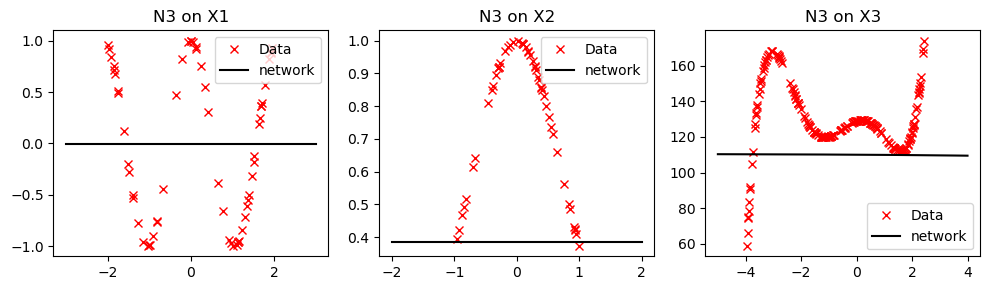

In [81]:
from matplotlib import pyplot

figure = pyplot.figure(figsize=(10, 3))

# plot first function
pyplot.subplot(131)
plot(X1, Theta_N3_X1_star, model_type=3, R=[-3, 3])
pyplot.title("N3 on X1")

# plot second function
pyplot.subplot(132)
plot(X2, Theta_N3_X2_star, model_type=3, R=[-2, 2])
pyplot.title("N3 on X2")

# plot third function
pyplot.subplot(133)
plot(X3, Theta_N3_X3_star, model_type=3, R=[-5, 4])
pyplot.title("N3 on X3")

pyplot.tight_layout()
pyplot.show()
